In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder


In [73]:
# Load the datasets
df_familia_pessoa = pd.read_csv('bases/df_fam_pessoas_amostra_100mil.csv', sep=',')
df_familia_pessoas_tratado = pd.read_csv('base_pre/df_var_caracterisca_pessoas.csv')
df_familia_pessoas_final = df_familia_pessoa.merge(df_familia_pessoas_tratado, on='id_familia', how='left')
#df_familia_pessoas_final = df_familia_pessoas_final.sample(10000)

In [74]:
df_familia_pessoas_final = df_familia_pessoas_final[['tem_idoso','tem_deficiente','classe_renda']]

In [75]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output
encoder.fit(df_familia_pessoas_final[['tem_idoso', 'tem_deficiente']])
encoded_features = encoder.transform(df_familia_pessoas_final[['tem_idoso', 'tem_deficiente']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['tem_idoso', 'tem_deficiente']))
df_encoded = pd.concat([df_familia_pessoas_final, encoded_df], axis=1)
df_encoded = df_encoded.drop(['tem_idoso', 'tem_deficiente'], axis=1)

In [76]:
df_encoded

,classe_renda,tem_idoso_0.0,tem_idoso_1.0,tem_deficiente_0.0,tem_deficiente_1.0
0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
254992,0.0,1.0,0.0,1.0,0.0
254993,0.0,1.0,0.0,1.0,0.0
254994,0.0,1.0,0.0,1.0,0.0
254995,1.0,0.0,1.0,1.0,0.0


Acurácia: 0.6998039215686275


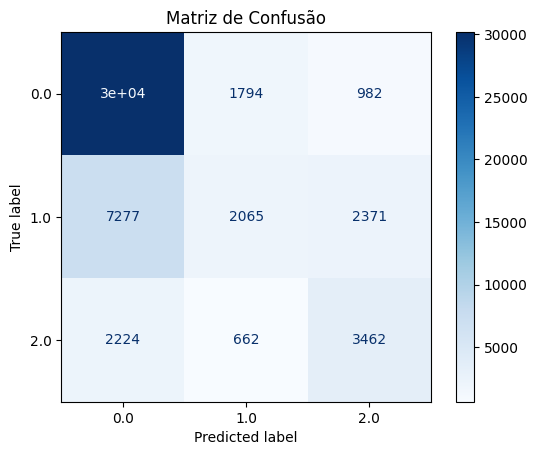

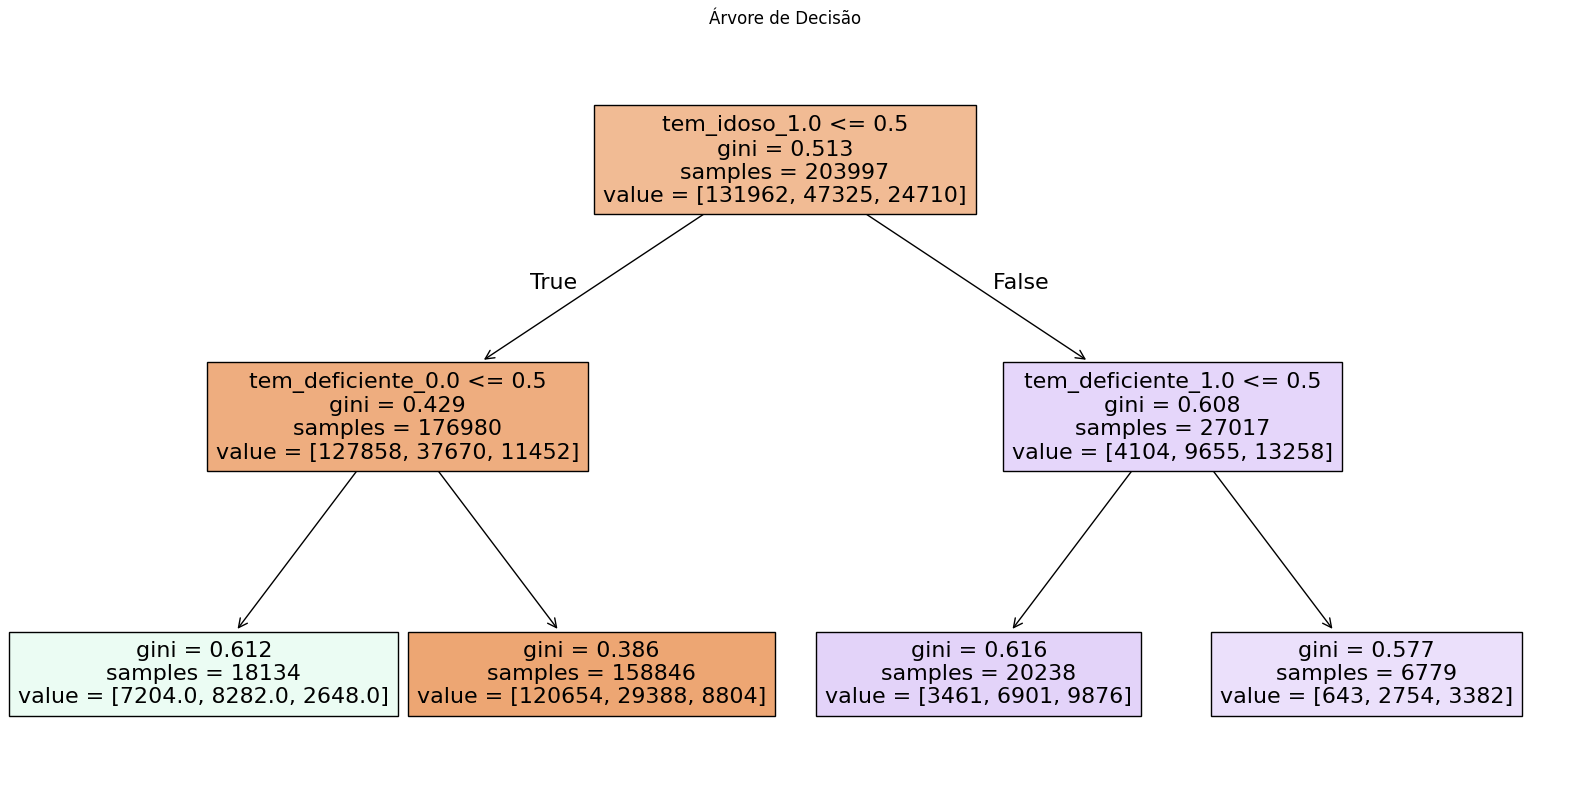

In [77]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output
encoder.fit(df_familia_pessoas_final[['tem_idoso', 'tem_deficiente']])
encoded_features = encoder.transform(df_familia_pessoas_final[['tem_idoso', 'tem_deficiente']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['tem_idoso', 'tem_deficiente']))
df_encoded = pd.concat([df_familia_pessoas_final, encoded_df], axis=1)
df_encoded = df_encoded.drop(['tem_idoso', 'tem_deficiente'], axis=1)

# Selecionando as variáveis que serão utilizadas para o modelo
X = df_encoded.drop('classe_renda', axis=1)

y = df_encoded['classe_renda']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurando e treinando a árvore de decisão
tree = DecisionTreeClassifier (max_depth=3, min_samples_split=2)
tree.fit(X_train, y_train)
# Fazendo previsões no conjunto de teste
y_pred = tree.predict(X_test)

# Calculando e imprimindo a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

# Visualizando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns)
plt.title('Árvore de Decisão')
plt.show()


